Gaussian Process test

In [103]:
sys.path.append(os.path.abspath(".."))

In [104]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
from src.models.gaussian_process import GaussianProcessWrapper
from sklearn.model_selection import train_test_split

In [105]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

In [106]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


Initializing Gaussian Process Wrapper

In [107]:
gp_tester = GaussianProcessWrapper()

Fitting Gaussian process


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [109]:
y_preds, y_stds = gp_tester.fit(X_train, y_train).predict(X, return_std=True)

In [110]:
print(y_preds.shape)
print(y_test.shape)

(100,)
(90, 1)


In [111]:
y_preds

array([ 0.30609101,  0.35433029,  0.40619812,  0.46115755,  0.51850502,
        0.57737779,  0.63677043,  0.69556064,  0.75254394,  0.80647606,
        0.85612146,  0.90030586,  0.93797   ,  0.96822223,  0.99038681,
        1.00404552,  1.00907025,  1.0056446 ,  0.99427327,  0.97577838,
        0.95128224,  0.92217677,  0.89007968,  0.85677791,  0.82415896,
        0.79413044,  0.76852898,  0.74901942,  0.73698619,  0.73341987,
        0.73880308,  0.75300208,  0.77517187,  0.80368522,  0.83609709,
        0.86915692,  0.8988811 ,  0.92069548,  0.92965429,  0.92073547,
        0.88920485,  0.83103208,  0.74333149,  0.6247915 ,  0.47604909,
        0.29996167,  0.10172997, -0.11116785, -0.32925696, -0.54156867,
       -0.73634796, -0.90192254, -1.02766402, -1.10495131, -1.12803292,
       -1.09468352, -1.00656239, -0.86920679, -0.691632  , -0.48555572,
       -0.26431419, -0.04158236,  0.1699561 ,  0.35982663,  0.52071342,
        0.64901329,  0.74491618,  0.81199873,  0.85638729,  0.88

In [112]:
sum((y_preds - y_test[0])**2)/len(y_test)

np.float64(0.9651606605321209)

In [113]:
y_preds = np.where(y_preds <= -4, 0, y_preds)

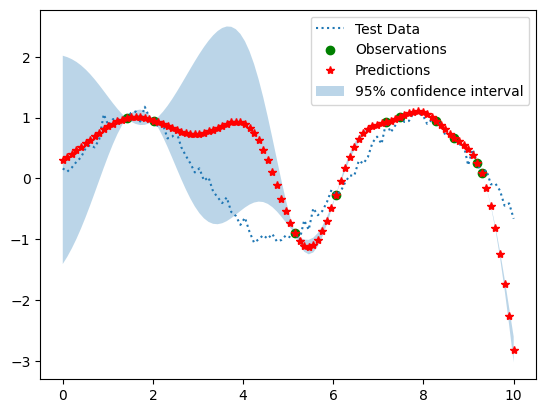

In [114]:
plt.plot(X, y ,label='Test Data', linestyle='dotted')
plt.scatter(X_train, y_train, label='Observations', color='g')
plt.plot(X, y_preds, "r*", label='Predictions')

# to see stds
plt.fill_between(X.ravel(), y_preds - 1.96 * y_stds,
                 y_preds + 1.96 * y_stds,
                 alpha=0.3,
                 label=r"95% confidence interval")
plt.legend()
plt.show()